#  Natural Language Processing on YELP Data Set 

# Part I Data Anaysis
--------------------------------

# Part II NLP Model

# Section I

### import library

In [1]:
import pandas as pd

# For the Stop Words
from nltk.corpus import stopwords

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


import pandas as pd
import string
import seaborn as sns


%matplotlib inline


/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Know your Dataset

In [23]:
df = pd.read_csv('yelp.csv')

In [24]:
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [25]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [27]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

# Plot The Data

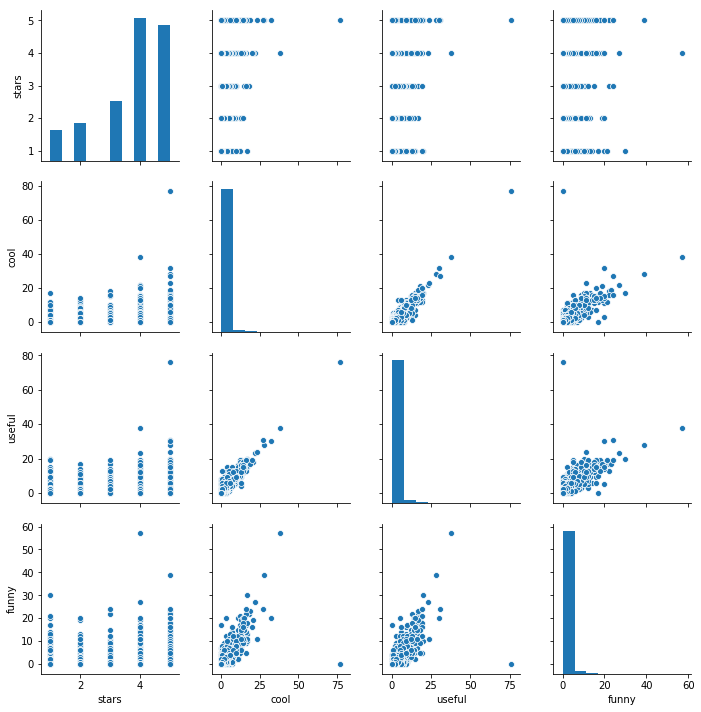

In [28]:
sns.pairplot(df)

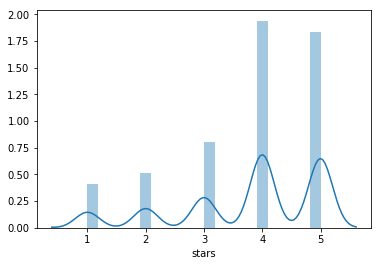

In [12]:
sns.distplot(df["stars"])

# Q) How Many People Gave 5 Star Ratings 

In [29]:
df["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

## Conclusion:  Maximum People Gave 4 Start Ratings 

Text(0.5, 1.0, 'Ratings vs Year ')

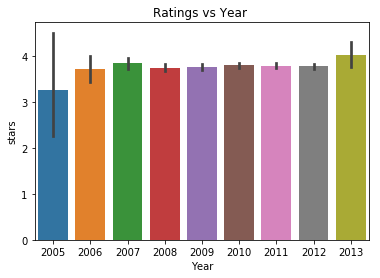

In [70]:
import matplotlib.pyplot as plt

df = pd.read_csv('yelp.csv')
df["date"]= pd.to_datetime(df["date"]).dt.date
df.set_index('date').head(1)
df["Year"] = pd.to_datetime(df["date"]).dt.year
sns.barplot(x=df["Year"], y=df["stars"], data=df)
plt.title("Ratings vs Year ")

Text(0.5, 1.0, 'Ratings vs month ')

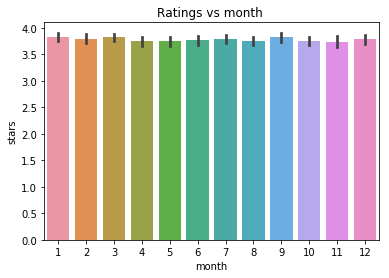

In [72]:
import matplotlib.pyplot as plt

df = pd.read_csv('yelp.csv')
df["date"]= pd.to_datetime(df["date"]).dt.date
df.set_index('date').head(1)
df["month"] = pd.to_datetime(df["date"]).dt.month
sns.barplot(x=df["month"], y=df["stars"], data=df)
plt.title("Ratings vs month ")

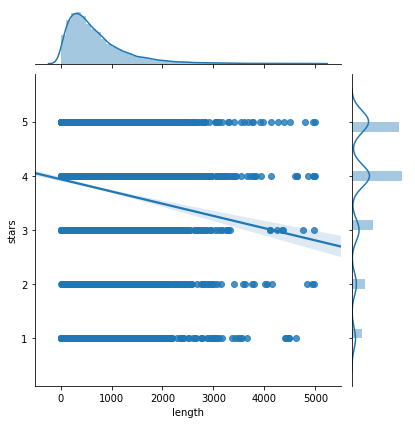

In [83]:
import matplotlib.pyplot as plt

df = pd.read_csv('yelp.csv')
df["date"]= pd.to_datetime(df["date"]).dt.date
df.set_index('date').head(1)

df["month"] = pd.to_datetime(df["date"]).dt.month
df["Year"] = pd.to_datetime(df["date"]).dt.year

df["length"] = df["text"].apply(len)
sns.jointplot(x=df["length"],
              y=df["stars"],
              data=df, kind='reg')


### It Looks like as lengthof text  Increases the Rating is decreasing !! as per the graph

# Section II

# NLP Model 

In [19]:
df = pd.read_csv('yelp.csv')
#df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))



              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

   micro avg       0.47      0.47      0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



# Method 2 

In [21]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)



pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Method 3 using custom Bag of words

In [84]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

#### Model 1

In [85]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LogisticRegression())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))




/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.97      0.29      0.44       228
           5       0.86      1.00      0.92       998

   micro avg       0.87      0.87      0.87      1226
   macro avg       0.91      0.64      0.68      1226
weighted avg       0.88      0.87      0.83      1226



#### model 2

In [ ]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))



#### model 3

In [ ]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))



#### Regression Model 

In [ ]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LinearRegression())])
val = pipe.fit(X_Train,Y_Train)



